In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
# Load the dataset
def load_data():
    for dirname, _, filenames in os.walk('D:Marketing.csv'):
        for filename in filenames:
            print(os.path.join(dirname, filename))
    df = pd.read_csv("D:/Marketing.csv")
    return df

df = load_data()


In [3]:
# Display basic information about the dataset
def data_overview(df):
    print(df.info())
    print(df.describe())
    print("Missing values:\n", df.isnull().sum())
    print("Duplicated rows:", df.duplicated().sum())

data_overview(df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             308 non-null    int64  
 1   c_date         308 non-null    object 
 2   campaign_name  308 non-null    object 
 3   category       308 non-null    object 
 4   campaign_id    308 non-null    int64  
 5   impressions    308 non-null    int64  
 6   mark_spent     308 non-null    float64
 7   clicks         308 non-null    int64  
 8   leads          308 non-null    int64  
 9   orders         308 non-null    int64  
 10  revenue        308 non-null    float64
dtypes: float64(2), int64(6), object(3)
memory usage: 26.6+ KB
None
               id   campaign_id   impressions     mark_spent        clicks  \
count  308.000000  3.080000e+02  3.080000e+02     308.000000    308.000000   
mean   154.500000  9.605628e+06  5.122475e+06   99321.038377   9739.996753   
std     89.056162  2.

In [4]:
# Calculate and print data accuracy
def calculate_data_accuracy(df):
    total_values = df.size
    non_null_values = df.count().sum()
    accuracy = (non_null_values / total_values) * 100
    print(f"Data Accuracy: {accuracy:.2f}%")

calculate_data_accuracy(df)


Data Accuracy: 100.00%


In [7]:
# Calculate and print the total marketing spent
def total_marketing_spent(df):
    total_spent = df['mark_spent'].sum()
    print(f"Total Marketing Spent: {total_spent}")

total_marketing_spent(df)


Total Marketing Spent: 30590879.82


Highest ROI Campaign: youtube_blogger with ROI of 559.40%


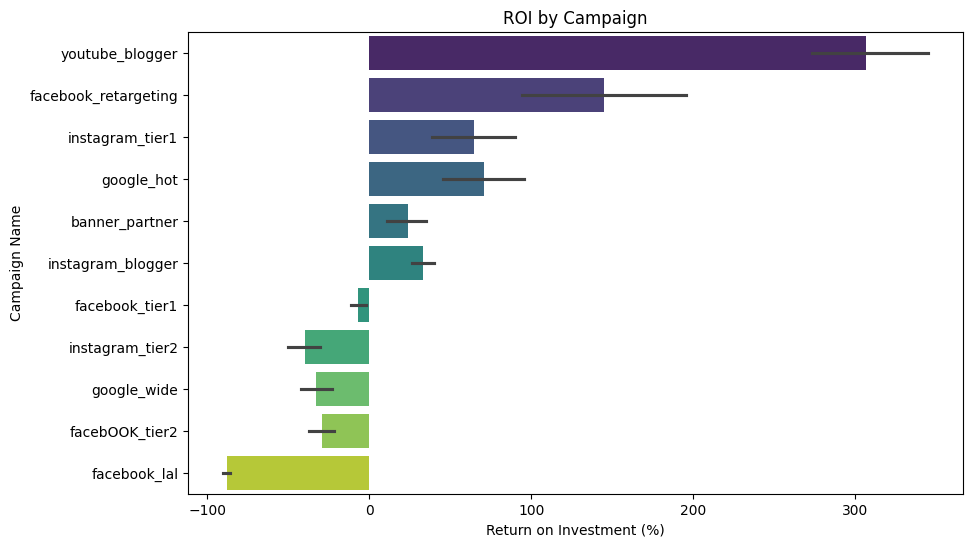

In [8]:
# Calculate ROI and plot
def plot_roi(df):
    df['ROI'] = ((df['revenue'] - df['mark_spent']) / df['mark_spent']) * 100
    max_roi_campaign = df.loc[df['ROI'].idxmax()]['campaign_name']
    max_roi_value = df['ROI'].max()
    print(f"Highest ROI Campaign: {max_roi_campaign} with ROI of {max_roi_value:.2f}%")
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='ROI', y='campaign_name', hue='campaign_name', data=df.sort_values('ROI', ascending=False), palette='viridis', dodge=False)
    plt.legend([],[], frameon=False)
    plt.title('ROI by Campaign')
    plt.xlabel('Return on Investment (%)')
    plt.ylabel('Campaign Name')
    plt.show()

plot_roi(df)


Lowest CPA Campaign: instagram_tier2 with CPA of 17.76


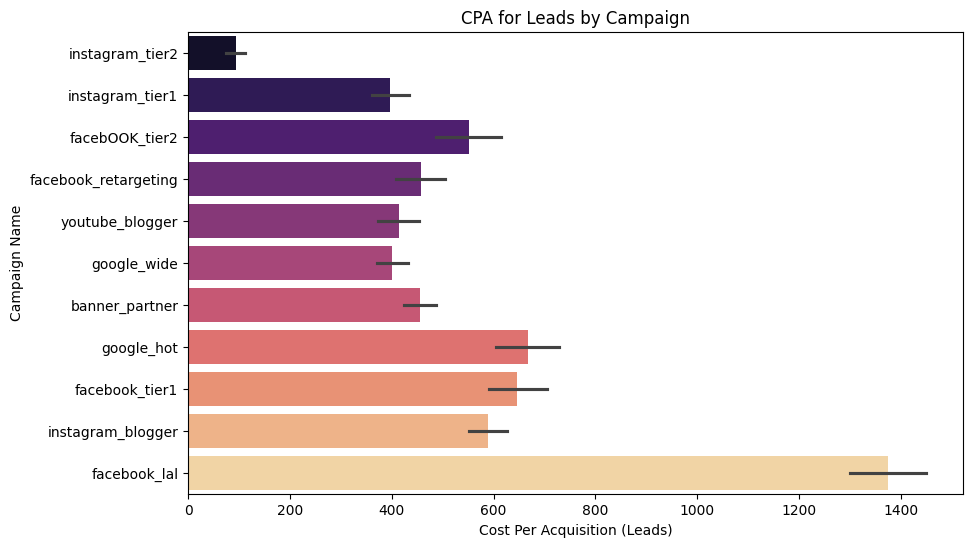

In [10]:
# Calculate CPA for leads and plot
def plot_cpa_leads(df):
    df['CPA_leads'] = df['mark_spent'] / df['leads']
    min_cpa_campaign = df.loc[df['CPA_leads'].idxmin()]['campaign_name']
    min_cpa_value = df['CPA_leads'].min()
    print(f"Lowest CPA Campaign: {min_cpa_campaign} with CPA of {min_cpa_value:.2f}")
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='CPA_leads', y='campaign_name', hue='campaign_name', data=df.sort_values('CPA_leads'), palette='magma', dodge=False)
    plt.legend([],[], frameon=False)
    plt.title('CPA for Leads by Campaign')
    plt.xlabel('Cost Per Acquisition (Leads)')
    plt.ylabel('Campaign Name')
    plt.show()

plot_cpa_leads(df)


Highest CTR Campaign: facebook_retargeting with CTR of 3.36%


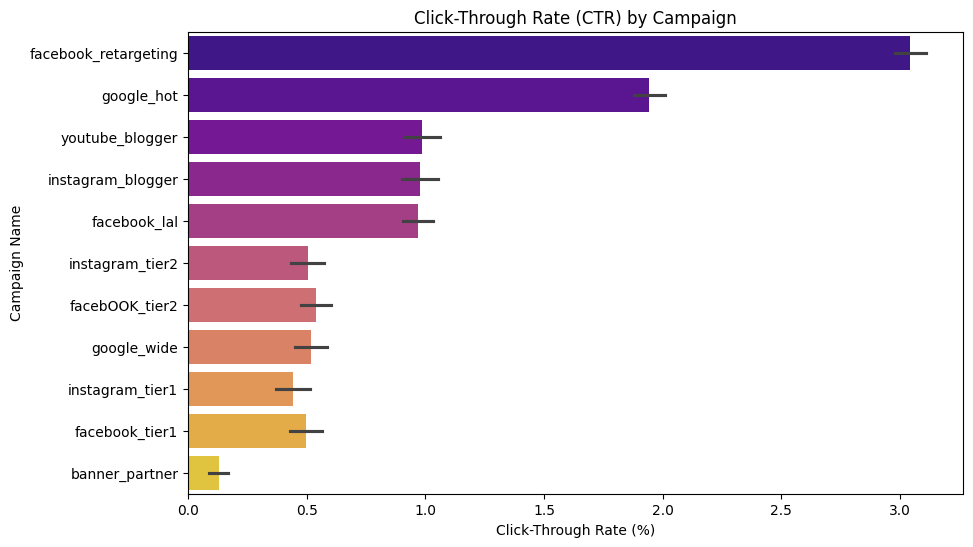

In [11]:
# Calculate CTR and plot
def plot_ctr(df):
    df['CTR'] = (df['clicks'] / df['impressions']) * 100
    max_ctr_campaign = df.loc[df['CTR'].idxmax()]['campaign_name']
    max_ctr_value = df['CTR'].max()
    print(f"Highest CTR Campaign: {max_ctr_campaign} with CTR of {max_ctr_value:.2f}%")
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='CTR', y='campaign_name', hue='campaign_name', data=df.sort_values('CTR', ascending=False), palette='plasma', dodge=False)
    plt.legend([],[], frameon=False)
    plt.title('Click-Through Rate (CTR) by Campaign')
    plt.xlabel('Click-Through Rate (%)')
    plt.ylabel('Campaign Name')
    plt.show()

plot_ctr(df)


Highest Conversion Rate Campaign: facebook_retargeting with Conversion Rate of 4.55%


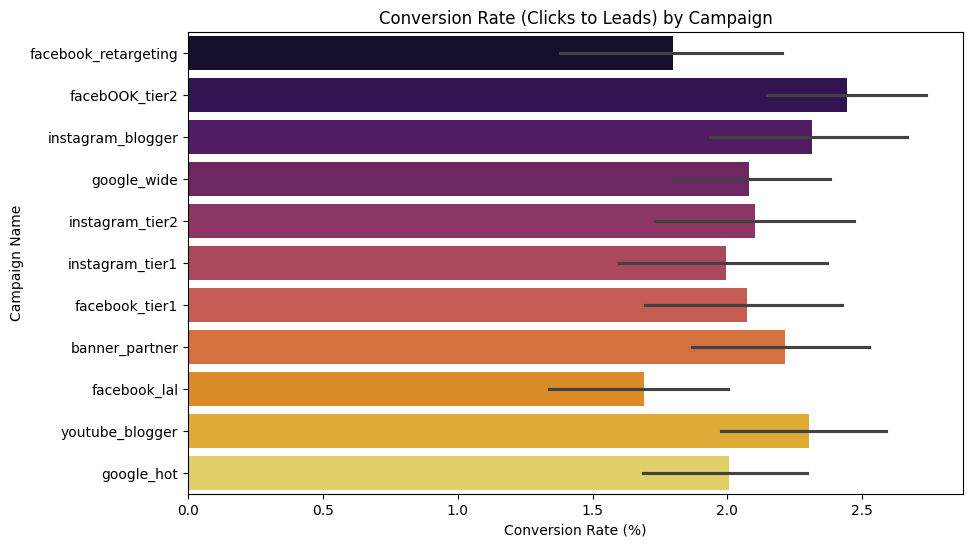

In [12]:
# Calculate conversion rate from clicks to leads and plot
def plot_conversion_rate(df):
    df['Conversion_Rate_Clicks_Leads'] = (df['leads'] / df['clicks']) * 100
    max_conversion_rate_campaign = df.loc[df['Conversion_Rate_Clicks_Leads'].idxmax()]['campaign_name']
    max_conversion_rate_value = df['Conversion_Rate_Clicks_Leads'].max()
    print(f"Highest Conversion Rate Campaign: {max_conversion_rate_campaign} with Conversion Rate of {max_conversion_rate_value:.2f}%")
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Conversion_Rate_Clicks_Leads', y='campaign_name', hue='campaign_name', data=df.sort_values('Conversion_Rate_Clicks_Leads', ascending=False), palette='inferno', dodge=False)
    plt.legend([],[], frameon=False)
    plt.title('Conversion Rate (Clicks to Leads) by Campaign')
    plt.xlabel('Conversion Rate (%)')
    plt.ylabel('Campaign Name')
    plt.show()

plot_conversion_rate(df)
